In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#POINTS POR MINUTO -> RATIO PARA USAR QUANDO FAZER MODELOS -> Inicio

In [2]:
import sys
print(sys.executable)
#PARA RODAREM A REGRESSAO LINEAR TÊM DE TER O SKLEARN INSTALADO NO MESMO AMBIENTE QUE O JUPYTER


/home/tiago/Desktop/projects/ac-data-mining-project/.venv/bin/python


In [3]:
players_df = pd.read_csv("data/players.csv")
players_teams_df = pd.read_csv("data/players_teams.csv")
teams_df = pd.read_csv("data/teams.csv")
teams_post_df = pd.read_csv("data/teams_post.csv")
coaches_df = pd.read_csv("data/coaches.csv")
series_post_df = pd.read_csv("data/series_post.csv")
awards_df = pd.read_csv("data/awards_players.csv")

Total de jogadoras com dados válidos: 774
Modelo Peso = -82.09 + 3.47 × Altura
Modelo Altura = 53.99 + 0.11 × Peso
🚫 Zeros restantes em 'height': 80
🚫 Zeros restantes em 'weight': 80

📊 Estatísticas descritivas (em cm e kg):
        height_cm   weight_kg
count  893.000000  893.000000
mean   166.567154   69.327510
std     52.981174   24.032207
min      0.000000    0.000000
25%    172.720000   65.770840
50%    182.880000   74.842680
75%    190.500000   81.646560
max    203.200000  115.212368


/tmp/ipykernel_95302/3925569618.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[140.27383426 178.49201498 181.96639505 175.01763492 140.27383426
 147.22259439 178.49201498 181.96639505 164.59449472 178.49201498
 150.69697446 171.54325485 171.54325485 161.12011466 161.12011466
 178.49201498 157.64573459 175.01763492 164.59449472 161.12011466
 168.06887479 181.96639505 185.44077511 171.54325485 181.96639505
 175.01763492 181.96639505 171.54325485 168.06887479 171.54325485
 161.12011466 175.01763492 185.44077511 168.06887479 168.06887479
 168.06887479 178.49201498 168.06887479 181.96639505]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  players_filled.loc[mask_missing_weight, 'weight'] = model_w.predict(


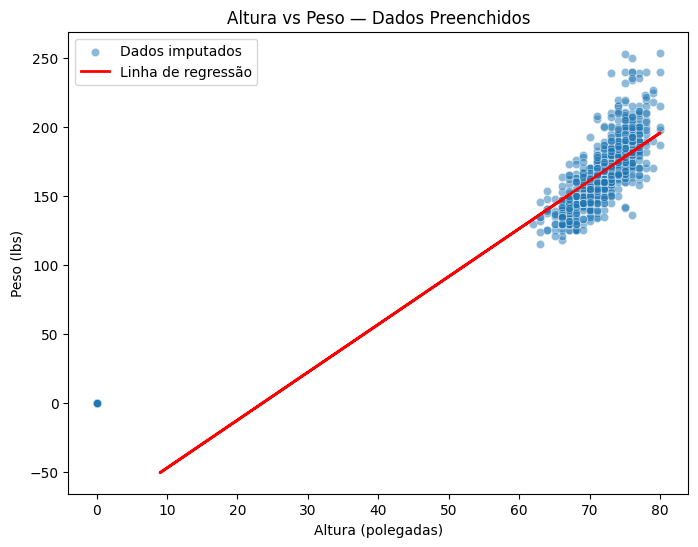

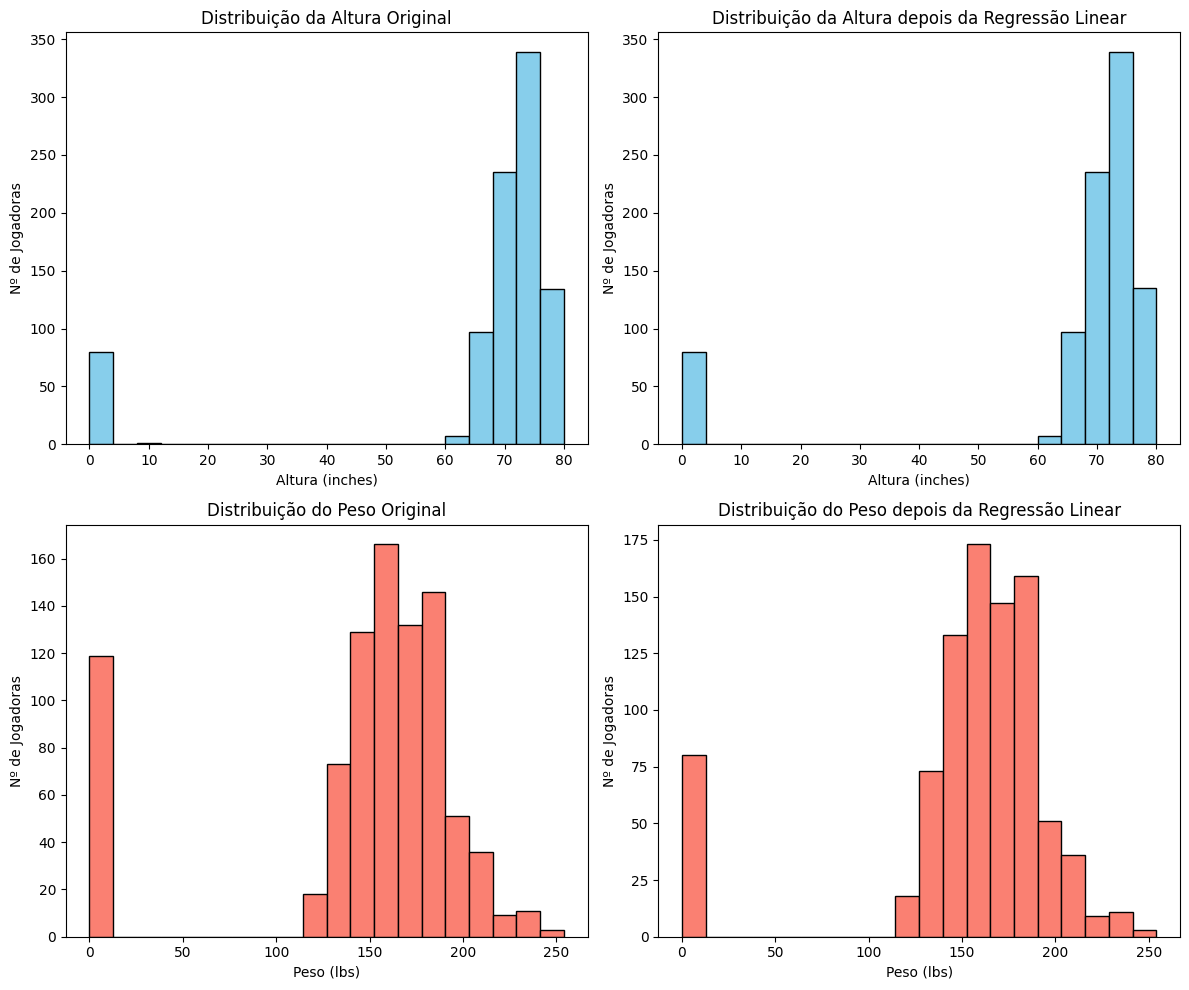

In [4]:
# ================================================================
# Limpeza e Imputação de Altura e Peso das Jogadoras
# ================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# ================================================================
# 1️ Preparação: Separar jogadoras com dados válidos
# ================================================================
# Consideramos válidos os casos em que tanto altura quanto peso > 0
valid = players_df[(players_df['height'] > 0) & (players_df['weight'] > 0)].copy()
players_filled = players_df.copy()

print(f"Total de jogadoras com dados válidos: {len(valid)}")

# ================================================================
# 2️ Treinar modelos de regressão linear
# ================================================================
# Modelo 1: Peso em função da altura
model_w = LinearRegression().fit(valid[['height']], valid['weight'])
# Modelo 2: Altura em função do peso
model_h = LinearRegression().fit(valid[['weight']], valid['height'])

print(f"Modelo Peso = {model_w.intercept_:.2f} + {model_w.coef_[0]:.2f} × Altura")
print(f"Modelo Altura = {model_h.intercept_:.2f} + {model_h.coef_[0]:.2f} × Peso")

# ================================================================
# 3️ Preencher valores faltantes usando regressão linear
# ================================================================

# Preencher peso quando altura existe
mask_missing_weight = (players_filled['height'] > 0) & (players_filled['weight'] == 0)
players_filled.loc[mask_missing_weight, 'weight'] = model_w.predict(
    players_filled.loc[mask_missing_weight, ['height']]
).astype(float)

# Preencher altura quando peso existe
mask_missing_height = (players_filled['height'] < 20) & (players_filled['weight'] > 0)
players_filled.loc[mask_missing_height, 'height'] = model_h.predict(
    players_filled.loc[mask_missing_height, ['weight']]
).astype(float)

'''
# ================================================================
# 4️ Preencher zeros restantes usando mediana por posição
# ================================================================
for col in ['height', 'weight']:
    players_filled[col] = players_filled.groupby('pos')[col].transform(
        lambda x: x.replace(0, x[x>0].median())
    )
'''
# ================================================================
# 5️ Converter para unidades métricas
# ================================================================
players_filled['height_cm'] = players_filled['height'] * 2.54
players_filled['weight_kg'] = players_filled['weight'] * 0.453592

# ================================================================
# 6️ Contagem de zeros restantes
# ================================================================
missing_height = (players_filled['height'] == 0).sum()
missing_weight = (players_filled['weight'] == 0).sum()
print(f"🚫 Zeros restantes em 'height': {missing_height}")
print(f"🚫 Zeros restantes em 'weight': {missing_weight}")

# ================================================================
# 7️ Estatísticas descritivas finais
# ================================================================
print("\n📊 Estatísticas descritivas (em cm e kg):")
print(players_filled[['height_cm', 'weight_kg']].describe())

# ================================================================
# 8️ Visualizações
# ================================================================
# Scatterplot com regressão linear
plt.figure(figsize=(8,6))
sns.scatterplot(x='height', y='weight', data=players_filled, alpha=0.5, label="Dados imputados")
plt.plot(valid['height'], model_w.predict(valid[['height']]), color='red', linewidth=2, label="Linha de regressão")
plt.xlabel("Altura (polegadas)")
plt.ylabel("Peso (lbs)")
plt.title("Altura vs Peso — Dados Preenchidos")
plt.legend()
plt.show()

# Histogramas
fig, axes = plt.subplots(2, 2, figsize=(12,10))
# Altura original
axes[0,0].hist(players_df['height'], bins=20, color="skyblue", edgecolor="black")
axes[0,0].set_title("Distribuição da Altura Original")
axes[0,0].set_xlabel("Altura (inches)"); axes[0,0].set_ylabel("Nº de Jogadoras")
# Altura imputada
axes[0,1].hist(players_filled['height'], bins=20, color="skyblue", edgecolor="black")
axes[0,1].set_title("Distribuição da Altura depois da Regressão Linear")
axes[0,1].set_xlabel("Altura (inches)"); axes[0,1].set_ylabel("Nº de Jogadoras")
# Peso original
axes[1,0].hist(players_df['weight'], bins=20, color="salmon", edgecolor="black")
axes[1,0].set_title("Distribuição do Peso Original")
axes[1,0].set_xlabel("Peso (lbs)"); axes[1,0].set_ylabel("Nº de Jogadoras")
# Peso imputado
axes[1,1].hist(players_filled['weight'], bins=20, color="salmon", edgecolor="black")
axes[1,1].set_title("Distribuição do Peso depois da Regressão Linear")
axes[1,1].set_xlabel("Peso (lbs)"); axes[1,1].set_ylabel("Nº de Jogadoras")
plt.tight_layout()
plt.show()



In [5]:
# ================================================================
# Limpeza de outras coisas
# ================================================================